In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime, timedelta

import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import pickle

In [32]:
with open('../02_Daten/Kaffeemaschine/preprocessed_coffee_scaled.pickle', 'rb') as handle:
    df = pickle.load(handle)

In [33]:
#!pip3 install pickle5
#import pickle5 as pickle

In [34]:
#from google.colab import drive
#drive.mount('/content/drive')

In [35]:
#!ls "/content/drive/MyDrive/Colab Notebooks/Innoprojekt/"

In [36]:
#with open('/content/drive/MyDrive/Colab Notebooks/Innoprojekt/preprocessed_coffee.pickle', 'rb') as handle:
 #   df = pickle.load(handle)

In [37]:
df.head()

,time,day_number,day_name,Status,x,y,z
0,2022-01-28 10:39:28.532,4,Freitag,0,-0.286314,0.185127,-0.094353
1,2022-01-28 10:39:28.742,4,Freitag,0,-0.224631,0.579710,0.564770
2,2022-01-28 10:39:28.915,4,Freitag,0,0.104340,1.368876,0.011101
3,2022-01-28 10:39:29.237,4,Freitag,0,-0.327435,1.095703,-0.278910
4,2022-01-28 10:39:29.455,4,Freitag,0,0.289387,1.186761,-0.331649


In [38]:
df.quantile(0.99)

day_number    6.000000
Status        0.000000
x             2.119292
y             1.308171
z             0.960259
Name: 0.99, dtype: float64

In [39]:
df.quantile(1 - 0.99)

day_number    0.000000
Status        0.000000
x            -1.746125
y            -1.666379
z            -0.964409
Name: 0.010000000000000009, dtype: float64

In [40]:
df.describe().round(3)

,day_number,Status,x,y,z
count,5604986.000,5604986.0,5604986.000,5604986.000,5604986.000
mean,3.007,0.0,0.000,-0.000,0.000
std,2.142,0.0,1.000,1.000,1.000
min,0.000,0.0,-100.499,-94.667,-217.951
25%,1.000,0.0,-0.677,-0.392,-0.279
50%,3.000,0.0,-0.142,0.064,-0.015
75%,5.000,0.0,0.721,0.458,0.275
max,6.000,0.0,63.431,95.189,103.363


In [41]:
# Labeln der Daten notwendig, um Modell zu trainieren...
# 1. Versuch mit Hilfe eines Moving Average
# Je nach Durchschnittswert einer der drei Klassen mit One Hot encoding zuordnen
# Problem: ist der Durchschnittswert konstant oder unterschiedlich, wenn Kaffee gemacht wird

# die ganze Idee macht keinen Sinn, da Moving Average immer bei ca. 1,5...
# man braucht andere Metrik als den Mittelwert. Eventuell einfach zählen, wie oft Wert von x, y, z in einem Abschnitt hoch bzw. niedrig ist


intersection = 2036476 - 5791

print(intersection + 5791)

offset = 120
one_part = df[intersection-350 : intersection]
#avg = (np.mean(one_part.x) + np.mean(one_part.y) + np.mean(one_part.z)) / 3
count_small = (one_part[(one_part.x > 2) | (one_part.x < -2)].count()[0]) + \
        (one_part[(one_part.y > 2) | (one_part.y < -2)].count()[0]) + \
        (one_part[(one_part.z > 2) | (one_part.z < -2)].count()[0])
count_big = (one_part[(one_part.x > 20) | (one_part.x < -20)].count()[0]) + \
                (one_part[(one_part.y > 20) | (one_part.y < -20)].count()[0]) + \
                (one_part[(one_part.z > 20) | (one_part.z < -20)].count()[0])



print(count_small, count_big)
# Leerlauf: 0, 0
# Tisch: 32, 4
# Kaffee: 413, 99
# Kaffee & Wasser: 494, 135

2036476
2 1


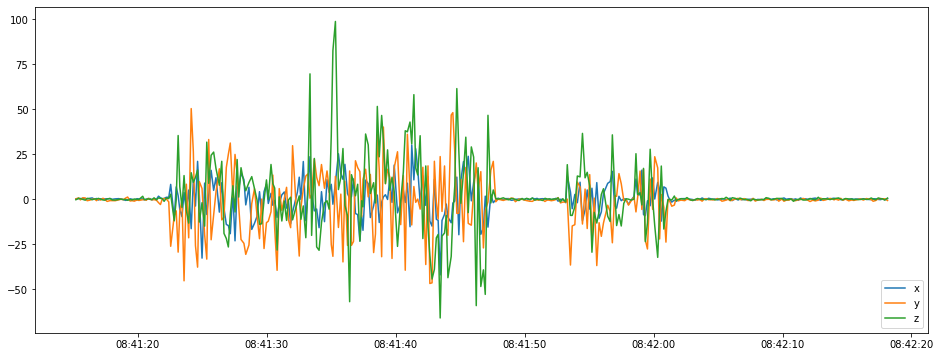

In [42]:
# Ausschnitt, bei dem Kaffee gemacht wird und Wasser nachgezogen wird
intersection = 1460000 - 5791
fig, ax = plt.subplots(figsize=(16,6))
ax.plot(df.time[intersection-350 : intersection], df.x[intersection-350 : intersection], label="x")
ax.plot(df.time[intersection-350 : intersection], df.y[intersection-350 : intersection], label='y')
ax.plot(df.time[intersection-350 : intersection], df.z[intersection-350 : intersection], label='z')

plt.legend(loc=4)

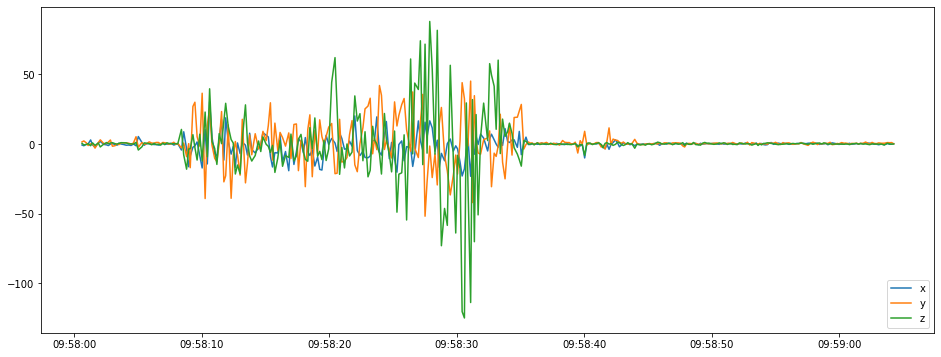

In [43]:
# Ausschnitt, wo Kaffee gemacht wird
intersection = 1486400 - 5791
fig, ax = plt.subplots(figsize=(16,6))
ax.plot(df.time[intersection-350 : intersection], df.x[intersection-350 : intersection], label="x")
ax.plot(df.time[intersection-350 : intersection], df.y[intersection-350 : intersection], label='y')
ax.plot(df.time[intersection-350 : intersection], df.z[intersection-350 : intersection], label='z')

plt.legend(loc=4)

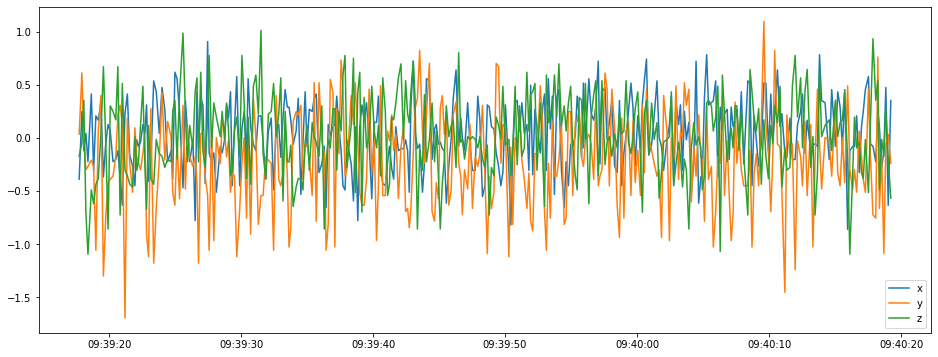

In [44]:
# Ausschnitt Leerlauf
intersection = 1480000 - 5791
fig, ax = plt.subplots(figsize=(16,6))
ax.plot(df.time[intersection-350 : intersection], df.x[intersection-350 : intersection], label="x")
ax.plot(df.time[intersection-350 : intersection], df.y[intersection-350 : intersection], label='y')
ax.plot(df.time[intersection-350 : intersection], df.z[intersection-350 : intersection], label='z')

plt.legend(loc=4)

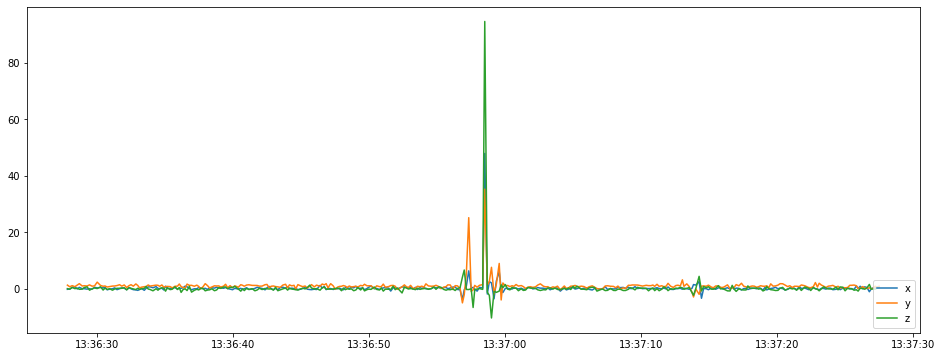

In [45]:
# Ausschnitt mit irrelevantem Zustand
intersection = 1558600 - 5791
fig, ax = plt.subplots(figsize=(16,6))
ax.plot(df.time[intersection-350 : intersection], df.x[intersection-350 : intersection], label="x")
ax.plot(df.time[intersection-350 : intersection], df.y[intersection-350 : intersection], label='y')
ax.plot(df.time[intersection-350 : intersection], df.z[intersection-350 : intersection], label='z')

plt.legend(loc=4)

In [48]:
for i in range(1486000 - 5791, 1486400 - 5791):
    intersection_value = (df.x[i] + df.y[i] + df.z[i]) / 3
    print(intersection_value)

0.39245587837602774
-0.15350954315911294
-0.03127564034333563
0.3517997128190498
-0.041123362486094266
-0.30239887472572763
-0.07152277627469517
0.1624133638055072
0.34661725353759065
0.3402795683142929
-0.2694148848802201
-0.020751830364092328
-0.3342435119675109
-0.10154639642283242
-0.08443797905794763
0.24554381376751974
0.7161118962035081
0.6588888376798431
0.2895566622203352
0.27367808844471103
0.036075775575838596
0.1990338680025063
0.17444039885778606
0.1952629643924416
-0.25794067720252456
0.014717335622475866
-0.2315114846195254
0.5637056687637837
0.40063912434611765
0.08653694341863616
0.21101989208150237
0.6122662869575685
0.036824768011396884
-0.10736422454718093
0.5002725694423079
0.19828880098905
0.24260563342324368
0.35433945460680955
-0.36249846999029717
0.20941240567438382
0.293100366921577
1.0096623587402889
0.14779392767377927
0.6027505246177945
-0.20704732764004585
0.17344215797726273
-0.10600275012798221
0.23518916338654525
-0.0565743816349972
0.36437239432620716


In [49]:
# für scaled
# Leerlauf: 0, 0
# Tisch: 32, 4
# Kaffee: 413, 99
# Kaffee & Wasser: 494, 135
intersection = 350

while intersection < len(df):
    offset = 0
    intersection_value = (df.x[intersection] + df.y[intersection] + df.z[intersection]) / 3
    if (intersection_value > -1 or intersection_value < 1):
        one_part = df[intersection-350 : intersection]
        #avg = (np.mean(one_part.x) + np.mean(one_part.y) + np.mean(one_part.z)) / 3
        count_small = (one_part[(one_part.x > 2) | (one_part.x < -2)].count()[0]) + \
                (one_part[(one_part.y > 2) | (one_part.y < -2)].count()[0]) + \
                (one_part[(one_part.z > 2) | (one_part.z < -2)].count()[0])
        '''count_big = (one_part[(one_part.x > 2) | (one_part.x < -2)].count()[0]) + \
                (one_part[(one_part.y > 2) | (one_part.y < -2)].count()[0]) + \
                (one_part[(one_part.z > 8) | (one_part.z < 0)].count()[0])'''
        
        if (count_small < 15):
            df.Status[intersection-350:intersection] = 0    # Leerlauf
        elif (count_small < 200):
            df.Status[intersection-350:intersection] = 1    # undefiniert (ein hoher Ausschlag)
        elif (count_small < 450):
            df.Status[intersection-350:intersection] = 2    # Kaffee ausgeben
        elif (count_small >= 450):
            df.Status[intersection-350:intersection] = 3    # Kaffee ausgeben und Wasser nachziehen

        intersection += 350
    else:  
        while (intersection_value <= -1 or intersection_value >= 1):
            offset += 60 
            intersection_value = (df.x[intersection+offset] + df.y[intersection+offset] + df.z[intersection+offset]) / 3 
            if (intersection_value > -1 or intersection_value < 1):
                
                    
                one_part = df[intersection-350:intersection+offset]
                #hier muss noch beachtet werden, dass die Länge des Abschnitts größer ist. Dadurch gibt es auch mehr Ausschläge.
                count_small = (one_part[(one_part.x > 2) | (one_part.x < -2)].count()[0]) + \
                        (one_part[(one_part.y > 2) | (one_part.y < -2)].count()[0]) + \
                        (one_part[(one_part.z > 2) | (one_part.z < -2)].count()[0])
                '''count_big = (one_part[(one_part.x > 2) | (one_part.x < -2)].count()[0]) + \
                        (one_part[(one_part.y > 2) | (one_part.y < -2)].count()[0]) + \
                        (one_part[(one_part.z > 8) | (one_part.z < 0)].count()[0])'''
                
                if (count_small < 15):
                    df.Status[intersection-350:intersection] = 0    # Leerlauf
                elif (count_small < 200):
                    df.Status[intersection-350:intersection] = 1    # undefiniert (ein hoher Ausschlag)
                elif (count_small < 450):
                    df.Status[intersection-350:intersection] = 2    # Kaffee ausgeben
                elif (count_small >= 450):
                    df.Status[intersection-350:intersection] = 3    # Kaffee ausgeben und Wasser nachziehen

                intersection += 350 + offset
            

C:\Users\pauls\AppData\Local\Temp/ipykernel_14120/2528239291.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Status[intersection-350:intersection] = 1    # undefiniert (ein hoher Ausschlag)
C:\Users\pauls\AppData\Local\Temp/ipykernel_14120/2528239291.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Status[intersection-350:intersection] = 2    # Kaffee ausgeben
C:\Users\pauls\AppData\Local\Temp/ipykernel_14120/2528239291.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_

In [50]:
df.head()

,time,day_number,day_name,Status,x,y,z
0,2022-01-28 10:39:28.532,4,Freitag,1,-0.286314,0.185127,-0.094353
1,2022-01-28 10:39:28.742,4,Freitag,1,-0.224631,0.579710,0.564770
2,2022-01-28 10:39:28.915,4,Freitag,1,0.104340,1.368876,0.011101
3,2022-01-28 10:39:29.237,4,Freitag,1,-0.327435,1.095703,-0.278910
4,2022-01-28 10:39:29.455,4,Freitag,1,0.289387,1.186761,-0.331649


In [51]:
leerlauf = df[df.Status == 0]
undefiniert = df[df.Status == 1]
kaffee = df[df.Status == 2]
kaffee_und_wasser = df[df.Status == 3]

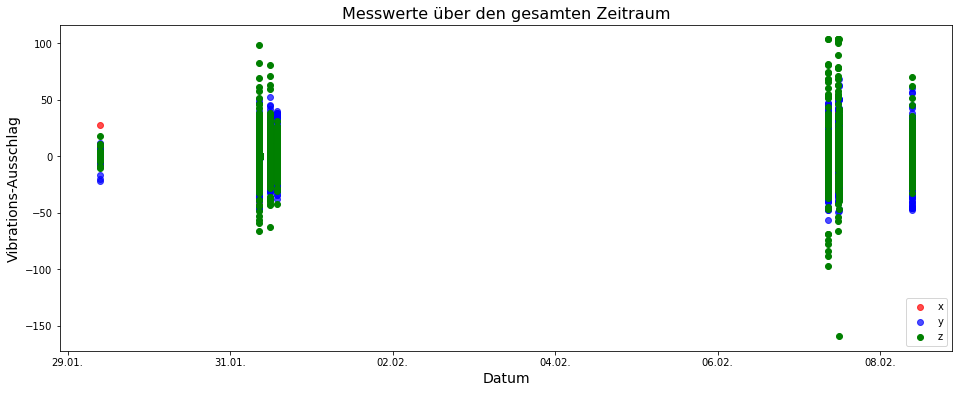

In [52]:
fig, ax = plt.subplots(figsize=(16,6))
ax.scatter(kaffee_und_wasser.time, kaffee_und_wasser.x, color='red', label='x', alpha=0.7)
ax.scatter(kaffee_und_wasser.time, kaffee_und_wasser.y, color='blue', label='y', alpha=0.7)
ax.scatter(kaffee_und_wasser.time, kaffee_und_wasser.z, color='green', label='z')

plt.legend(loc=4)
ax.set_xlabel("Datum", fontsize=14)
ax.set_ylabel("Vibrations-Ausschlag", fontsize=14)    
ax.set_title("Messwerte über den gesamten Zeitraum", fontsize=16)  

date_form = DateFormatter("%d.%m.")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.DayLocator(interval=2))

In [53]:
a = df['time'][100000] - df['time'][0]

In [54]:
a < timedelta(days=0, hours=5)

False

In [55]:
kaffee_und_wasser

,time,day_number,day_name,Status,x,y,z
467950,2022-01-29 09:38:33.636,5,Samstag,3,2.037049,3.098972,-0.331649
467951,2022-01-29 09:38:33.854,5,Samstag,3,2.242656,2.613331,-0.727126
467952,2022-01-29 09:38:34.004,5,Samstag,3,2.694992,2.097338,-0.463479
467953,2022-01-29 09:38:34.176,5,Samstag,3,2.592188,2.279453,-0.358012
467954,2022-01-29 09:38:34.341,5,Samstag,3,2.674432,3.098972,-0.173456
...,...,...,...,...,...,...,...
5038945,2022-02-08 09:20:17.872,1,Dienstag,3,-1.561079,0.003011,0.670236
5038946,2022-02-08 09:20:18.021,1,Dienstag,3,-1.663882,0.549357,-0.410739
5038947,2022-02-08 09:20:18.164,1,Dienstag,3,-1.293789,0.185127,0.380214
5038948,2022-02-08 09:20:18.322,1,Dienstag,3,-1.581639,-0.179104,-0.015263


In [56]:
kaffee_und_wasser['time'][0:1]

467950   2022-01-29 09:38:33.636
Name: time, dtype: datetime64[ns]

In [57]:
kaffee_und_wasser.reset_index(inplace=True, drop=True)

In [58]:
kaffee_und_wasser['time'].iloc[1] - kaffee_und_wasser['time'].iloc[0] 

Timedelta('0 days 00:00:00.218000')

In [59]:
len(kaffee_und_wasser)

2800

In [60]:
for i in kaffee_und_wasser.items():
    print(i)

('time', 0      2022-01-29 09:38:33.636
1      2022-01-29 09:38:33.854
2      2022-01-29 09:38:34.004
3      2022-01-29 09:38:34.176
4      2022-01-29 09:38:34.341
                 ...          
2795   2022-02-08 09:20:17.872
2796   2022-02-08 09:20:18.021
2797   2022-02-08 09:20:18.164
2798   2022-02-08 09:20:18.322
2799   2022-02-08 09:20:18.457
Name: time, Length: 2800, dtype: datetime64[ns])
('day_number', 0       5
1       5
2       5
3       5
4       5
       ..
2795    1
2796    1
2797    1
2798    1
2799    1
Name: day_number, Length: 2800, dtype: int64)
('day_name', 0        Samstag
1        Samstag
2        Samstag
3        Samstag
4        Samstag
          ...   
2795    Dienstag
2796    Dienstag
2797    Dienstag
2798    Dienstag
2799    Dienstag
Name: day_name, Length: 2800, dtype: object)
('Status', 0       3
1       3
2       3
3       3
4       3
       ..
2795    3
2796    3
2797    3
2798    3
2799    3
Name: Status, Length: 2800, dtype: int64)
('x', 0       2.037049

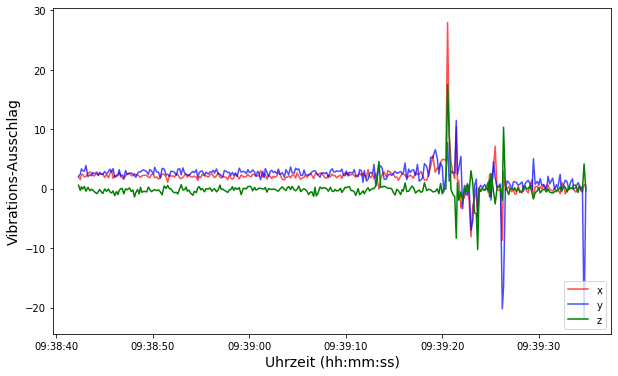

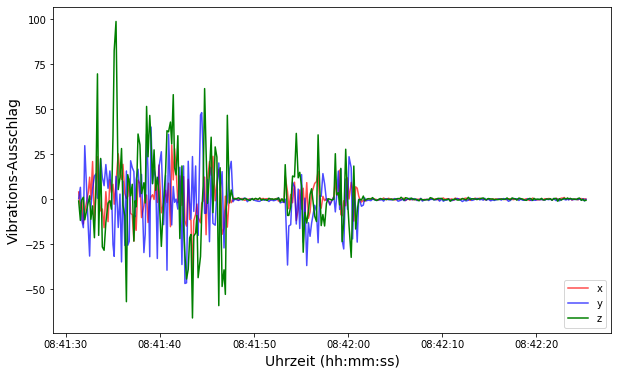

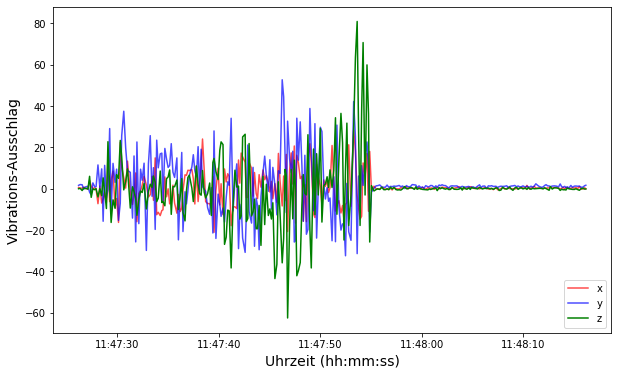

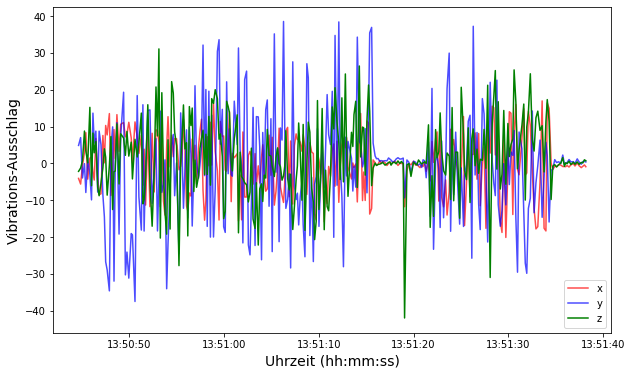

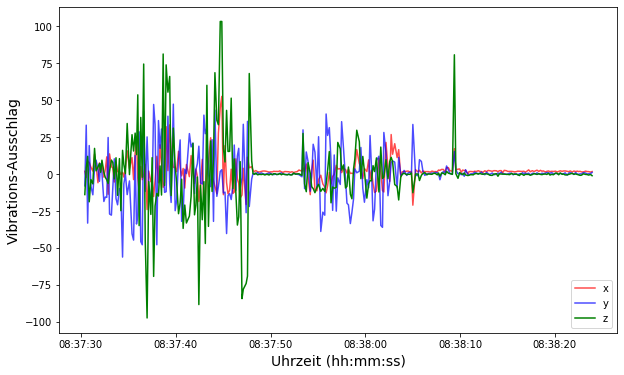

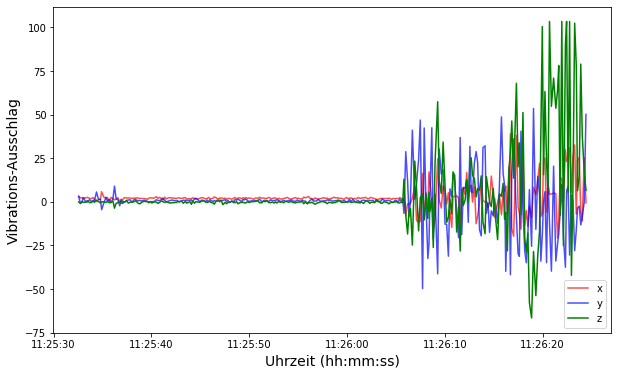

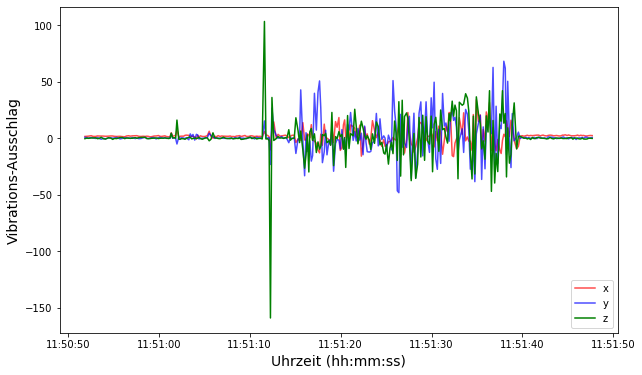

In [61]:
for index, elem in enumerate(kaffee_und_wasser.iterrows()):
    if (index+1 < len(kaffee_und_wasser) and index - 1 >= 0):
        prev_time = kaffee_und_wasser['time'][index-1]
        curr_time = kaffee_und_wasser['time'][index]

        delta = curr_time - prev_time

        if (delta > timedelta(minutes=2)):
            fig, ax = plt.subplots(figsize=(10,6))
            ax.plot(kaffee_und_wasser.time[index - 300: index], kaffee_und_wasser.x[index - 300: index], color='red', label='x', alpha=0.7)
            ax.plot(kaffee_und_wasser.time[index - 300: index], kaffee_und_wasser.y[index - 300: index], color='blue', label='y', alpha=0.7)
            ax.plot(kaffee_und_wasser.time[index - 300: index], kaffee_und_wasser.z[index - 300: index], color='green', label='z')

            plt.legend(loc=4)
            ax.set_xlabel("Uhrzeit (hh:mm:ss)", fontsize=14)
            ax.set_ylabel("Vibrations-Ausschlag", fontsize=14)

In [62]:
X = df[['x','y','z']]
y = df[['Status']]

In [72]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25)

In [73]:
# importing classifier
from sklearn.naive_bayes import GaussianNB

# initializaing the NB
classifer = GaussianNB()

# training the model
classifer.fit(X_train, y_train)

# testing the model
y_pred = classifer.predict(X_test)

c:\Users\pauls\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [74]:
# importing accuracy score
from sklearn.metrics import accuracy_score

# printing the accuracy of the model
print(accuracy_score(y_pred, y_test))

0.9540544957455752


In [66]:
# Der Score ist gut
# ABER: Die Labels wurden mit einfachen Funktion und nicht per Hand gemacht. Das heißt schon da können Fehler auftreten
# Außerdem ist bestimmt zu 95% der Zeit oder mehr die Maschine im Leerlauf. Das heißt, wenn Modell immer Leerlauf vorhersagt, hat man schon eine Genauigkeit von 95%

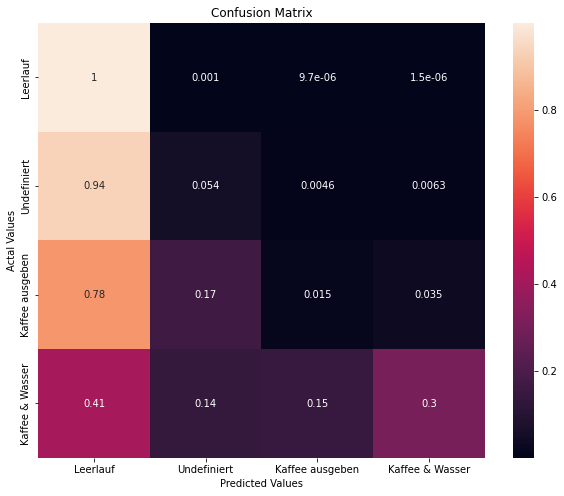

In [75]:
from sklearn.metrics import confusion_matrix

# Creating  a confusion matrix,which compares the y_test and y_pred
cm = confusion_matrix(y_test, y_pred)
# In Prozent:
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(cm,
                     index = ['Leerlauf','Undefiniert','Kaffee ausgeben', 'Kaffee & Wasser'], 
                     columns = ['Leerlauf','Undefiniert','Kaffee ausgeben', 'Kaffee & Wasser'])

#Plotting the confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [67]:
y_test

,Status
4118839,0
2447557,0
4748530,1
918351,0
743592,0
...,...
1126668,0
3350017,0
1590343,0
4534265,0


In [68]:
y_test['predict'] = y_pred
wrong_pred = y_test[y_test.Status != y_test.predict]

In [69]:
wrong_pred

,Status,predict
4748530,1,0
4732395,1,0
2511244,0,1
4728840,1,0
4591208,1,0
...,...,...
4616170,1,0
4633309,1,0
4756587,1,0
4590140,1,0


In [70]:
unique, counts = np.unique(y_pred, return_counts=True)
dict(zip(unique, counts))

{0: 1391880, 1: 7396, 2: 618, 3: 1353}